<a href="https://colab.research.google.com/github/Richard-Gidi/10Analytics/blob/main/Alytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting up the Environment

In [3]:
from google.colab import drive


# Mount our drive to the working space
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
# Locate and store our Dataset into "file_path"
youth="/content/gdrive/MyDrive/10Analytics/1. youth-mortality-rate.csv"
infant_deaths="/content/gdrive/MyDrive/10Analytics/2. number-of-infant-deaths-unwpp.csv"
child_mortality="/content/gdrive/MyDrive/10Analytics/3. child-mortality-by-income-level-of-country.csv"
cause_of_death="/content/gdrive/MyDrive/10Analytics/4. Distribution of Causes of Death among Children Aged less than 5 years.csv"
maternal_death="/content/gdrive/MyDrive/10Analytics/5. number-of-maternal-deaths-by-region.csv"
birth="/content/gdrive/MyDrive/10Analytics/6. births-attended-by-health-staff-sdgs.csv"
global_vaccination="/content/gdrive/MyDrive/10Analytics/7. global-vaccination-coverage.csv"
health_protection="/content/gdrive/MyDrive/10Analytics/8. health-protection-coverage.csv"

In [90]:
#pip install streamlit pandas scikit-learn


# Achieving the Sustainable Development Goals: A Call to Action for Child Mortality

In 2015, the world began working toward a new global development agenda, seeking to achieve, by 2030, the targets set out in the Sustainable Development Goals (SDGs). Among these, the proposed SDG target for child mortality focuses on ending preventable deaths of newborns and children under 5 years of age. This ambitious goal includes reducing neonatal mortality to at least 12 deaths per 1,000 live births and under-5 mortality to no more than 25 deaths per 1,000 live births in all countries.

---

## **Introduction**

In a world where every child deserves a chance to thrive, the grim reality of child and infant mortality in Africa remains a heartbreaking challenge. Each year, millions of children under five succumb to preventable causes—despite significant advancements in healthcare and technology. Addressing this issue is not just a matter of survival but a moral imperative that directly aligns with **Sustainable Development Goal 3**: ensuring healthy lives and promoting well-being for all.

This hackathon presents a unique opportunity to harness the power of data to rewrite this narrative. By uncovering hidden patterns, correlations, and disparities within the provided datasets, we can illuminate the critical factors driving child and infant mortality. Armed with these insights, we aim to propose actionable, data-driven solutions that empower policymakers and healthcare providers to make informed decisions, ensuring no child is left behind.

---

### **The Vision**

Let’s reimagine a future where every child, regardless of geography or circumstance, has access to the healthcare and support systems they need to celebrate their fifth birthday and beyond. Together, we can move closer to the realization of SDG 3 and ensure that the promise of a brighter tomorrow extends to every child.


# Importing Relevant Libraries

In [95]:
# Data Manipulation
import numpy as np          #useful for algebraic calculations in our analysis.
import pandas as pd         # Used for data manipulation and analysis, enabling us to load, clean, and transform our dataset.

# Data Visualization
import matplotlib.pyplot as plt   # For visualization
import seaborn as sns             # Built on top of Matplotlib, Seaborn provides a high-level interface for drawing attractive statistical graphics.

# Warning Suppression
import warnings
warnings.filterwarnings('ignore')  # Suppresses warnings (such as deprecation warnings) to keep the output clean and focused.


import scipy.stats as stats
from sklearn.preprocessing import StandardScaler


# Machine Learning
from sklearn import preprocessing   # Helps transform categorical data into a numerical format  suitable for ML algorithms.
from sklearn.model_selection import train_test_split # Helps split the dataset into training and testing sets, crucial for model validation.
from sklearn.feature_selection import mutual_info_regression  # measures the dependency between each feature and the target variable.


# Regression Models
from sklearn.ensemble import RandomForestRegressor

# Ensemble methods combining the predictions of multiple base estimators (like decision trees) to improve model performance and accuracy.
from sklearn.linear_model import LinearRegression   # A model that finds the best-fit line for predicting continuous outcomes.
from sklearn.svm import SVR                         # Support Vector Regressor, used for regression problems with a hyperplane that best fits the data.
from sklearn.neighbors import KNeighborsRegressor   # A non-parametric method for regression that predicts based on nearest neighbors in feature space.
from xgboost import XGBRegressor                    # An implementation of gradient-boosted decision trees designed for high performance.
from lightgbm import LGBMRegressor                  # A gradient-boosting framework optimized for speed and efficiency, especially with large datasets.



# Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Metrics for evaluating regression models:
# - mean_absolute_error (MAE): The average absolute difference between predicted and actual values.
# - mean_squared_error (MSE): The average of the squares of the errors, penalizing larger errors more heavily.
# - r2_score: The proportion of the variance in the target variable explained by the model, indicating model fit quality.

import joblib     #save our model
import streamlit as st


# Loading the Datasets

In [6]:
# Load datasets into DataFrames
youth = pd.read_csv(youth)
infant_deaths = pd.read_csv(infant_deaths)
child_mortality = pd.read_csv(child_mortality)
cause_of_death = pd.read_csv(cause_of_death)
maternal_death = pd.read_csv(maternal_death)
birth = pd.read_csv(birth)
global_vaccination = pd.read_csv(global_vaccination)
health_protection = pd.read_csv(health_protection)

View the head of each DataFrame

In [7]:
youth.head()



,Entity,Code,Year,Under-fifteen mortality rate
0,Afghanistan,AFG,1977,30.110573
1,Afghanistan,AFG,1978,29.290777
2,Afghanistan,AFG,1979,28.479010
3,Afghanistan,AFG,1980,27.649078
4,Afghanistan,AFG,1981,26.834482


# Youth Mortality Rates Dataset Overview

## Dataset Description
The **Youth Mortality Rates** dataset provides a comprehensive view of mortality rates for individuals under the age of 15 across various entities (countries or regions).

---

## Importance of the Dataset
Understanding youth mortality rates is crucial for several reasons:

### 1. **Indicator of Health Systems**
Youth mortality rates reflect the quality of a country’s healthcare systems, public health policies, and socioeconomic conditions. Higher rates often point to systemic issues such as inadequate medical care, malnutrition, or poor sanitation.

### 2. **Tracking Progress Toward SDGs**
This dataset helps assess progress toward **Sustainable Development Goal 3 (Good Health and Well-being)**, which aims to reduce preventable deaths among children and youth.

### 3. **Enabling Targeted Interventions**
By identifying patterns and disparities, this data allows policymakers to develop focused interventions addressing specific challenges like vaccination gaps, poverty, or unsafe living environments.

### 4. **Providing Historical Perspectives**
The dataset offers insights into historical trends, illustrating how mortality rates have changed over time due to medical advancements, public health efforts, and improvements in living conditions.

### 5. **Highlighting Inequities**
It underscores regional and global disparities, enabling stakeholders to prioritize vulnerable populations at higher risk.

---

## Relevance and Impact
Reducing youth mortality rates is pivotal for fostering a healthier, more productive generation. Insights derived from this data can guide resource allocation, inform public policies, and help save countless lives.

Would you like to explore trends, perform a comparative analysis, or dive deeper into specific aspects of the dataset? Let’s analyze it further!


Data Exploration

In [9]:
#We will drop "Code" since we already have "Entity" in our data
youth.drop("Code", axis=1, inplace=True)

# Let us investigate these missing values
missing_values = round(youth.isnull().sum() / youth.shape[0] * 100,2)

# Filter to only include columns with missing values and print
missing_columns = missing_values[missing_values > 0]
print(missing_columns)

Series([], dtype: float64)


## Trend Analysis For Youth Mortality Rate

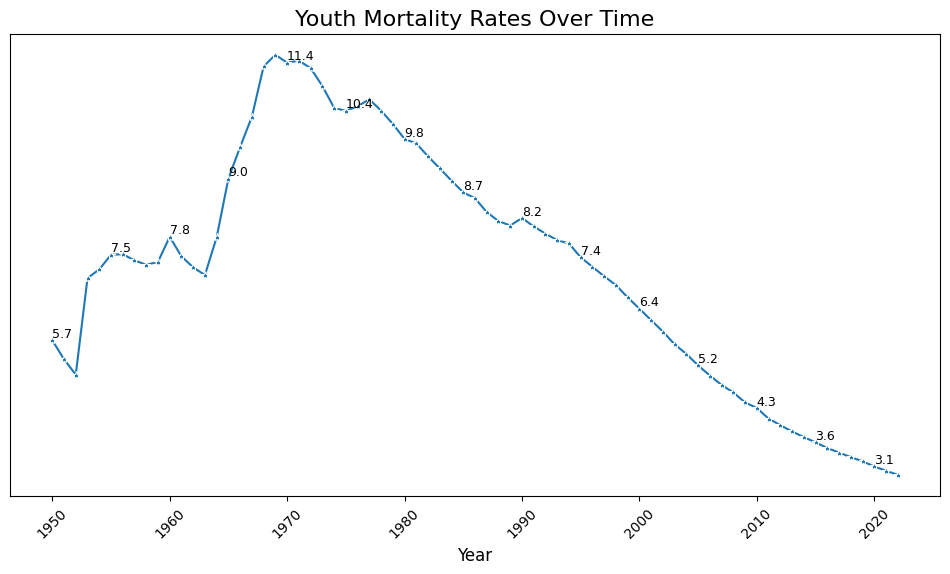

In [10]:
# Plot the data
plt.figure(figsize=(12, 6))

# Plot the lineplot with Year on the x-axis and Under-fifteen mortality rate on the y-axis
sns.lineplot(x='Year', y='Under-fifteen mortality rate', data=youth, ci=None,marker='*')

# Set the title and labels
plt.title('Youth Mortality Rates Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Under-fifteen Mortality Rate', fontsize=12)

# Add selective data labels (just a few data points)
for i, line in enumerate(plt.gca().lines):
    if i % 5 == 0:  # Show every 5th data point as label
        for x, y in zip(line.get_xdata(), line.get_ydata()):
            if x % 5 == 0:  # Adjust condition for which data points to label
                plt.text(x, y, f'{y:.1f}', fontsize=9, color='black', ha='left', va='bottom')

# Customize the plot
plt.title('Youth Mortality Rates Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('')  # Hide y-axis label
plt.yticks([])  # Remove y-axis values
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.grid(False)  # Remove gridlines

# Show the plot
plt.show()


In [11]:
# Calculate the average youth mortality rate for each country
top_countries = youth.groupby('Entity')['Under-fifteen mortality rate'].mean().nlargest(10)

# Display the top 10 countries
print(top_countries)

Entity
Guinea          27.614073
Niger           26.006522
Mali            22.307122
Sierra Leone    21.011334
Liberia         20.187777
Nigeria         19.711586
Chad            19.691660
Burundi         19.600290
Rwanda          19.273525
Benin           18.852082
Name: Under-fifteen mortality rate, dtype: float64


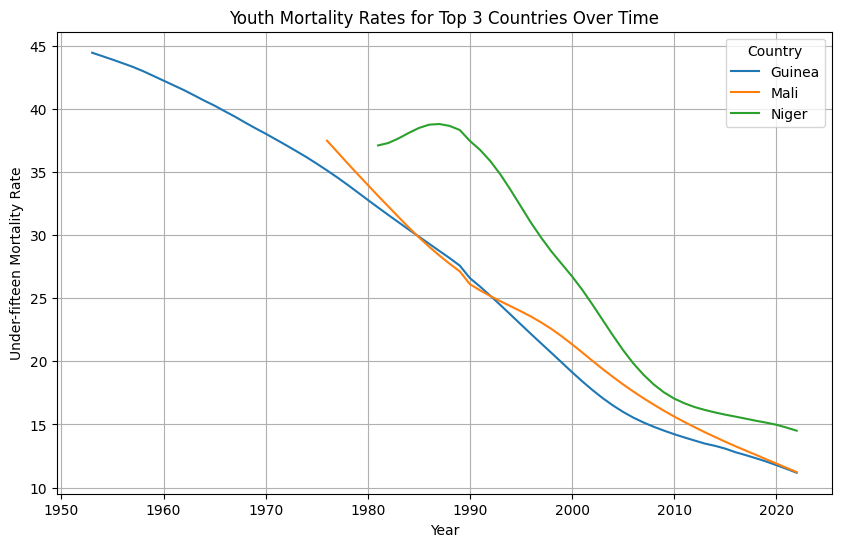

In [12]:
top_3_countries = youth.groupby('Entity')['Under-fifteen mortality rate'].mean().nlargest(3).index

# Filter the dataset for the top 3 countries
top_3_data = youth[youth['Entity'].isin(top_3_countries)]

# Plotting trends for the top 3 countries
plt.figure(figsize=(10, 6))
sns.lineplot(data=top_3_data, x='Year', y='Under-fifteen mortality rate', hue='Entity')
plt.title("Youth Mortality Rates for Top 3 Countries Over Time")
plt.xlabel("Year")
plt.ylabel("Under-fifteen Mortality Rate")
plt.legend(title='Country')
plt.grid(True)
plt.show()

### Observation

The data reveals that, on average, youth mortality rates have been steadily declining over the years. This decline is a promising sign, indicating improvements in healthcare, better vaccination coverage, and stronger overall health systems. These improvements have contributed to a reduction in preventable deaths among children. This trend is consistent with the targets set by **Sustainable Development Goal (SDG) 3**, which aims to reduce under-5 mortality to no more than 25 deaths per 1,000 live births by 2030.

If these trends continue, there is optimism that achieving SDG 3's targets by 2030 is within reach. However, continued effort is required to address the remaining gaps in healthcare infrastructure, particularly in rural and underserved areas. Ongoing progress will depend on improving maternal health, increasing access to healthcare, and enhancing vaccination rates.

### Conclusion and Recommendations

1. **Healthcare Improvements**  
   The overall decline in youth mortality rates indicates that healthcare systems, vaccination coverage, and social conditions have improved. However, targeted interventions may still be needed in countries like Mali,Niger among others, where certain periods show slower declines or spikes in mortality.

2. **Maternal and Child Health**  
   Strengthening maternal health, providing prenatal care, and addressing nutrition will be crucial for further reducing youth mortality. Ensuring healthcare access for rural and underprivileged populations, who often experience the highest mortality rates, is key to continued success.

3. **Global Collaboration**  
   Collaboration with international organizations and neighboring countries could provide valuable insights and resources. Sharing best practices and collectively improving the healthcare infrastructure could support faster progress in achieving SDG 3.

### Moving Forward

To achieve the goal of reducing preventable child mortality by 2030, policymakers must focus on improving healthcare access, particularly in rural and underserved areas. Strengthening public health campaigns and providing the necessary resources to vulnerable populations will be essential. If these efforts are sustained, the reduction of youth mortality can be achieved, improving the lives of millions of children globally.


Child Mortality Rate

In [13]:
child_mortality.head()

,Entity,Code,Year,Observation value - Indicator: Under-five mortality rate - Sex: Total - Wealth quintile: Total - Unit of measure: Deaths per 100 live births
0,Afghanistan,AFG,1957,37.245758
1,Afghanistan,AFG,1958,36.626625
2,Afghanistan,AFG,1959,36.043480
3,Afghanistan,AFG,1960,35.459850
4,Afghanistan,AFG,1961,34.894880


In [14]:
# Rename columns and drop "Code" since it is not important to our analysis
child_mortality.columns=["Entity","Code","Year","Under-five mortality rate"]
child_mortality.drop("Code", axis=1, inplace=True)
child_mortality.head()

,Entity,Year,Under-five mortality rate
0,Afghanistan,1957,37.245758
1,Afghanistan,1958,36.626625
2,Afghanistan,1959,36.043480
3,Afghanistan,1960,35.459850
4,Afghanistan,1961,34.894880


Trend Analysis for Children

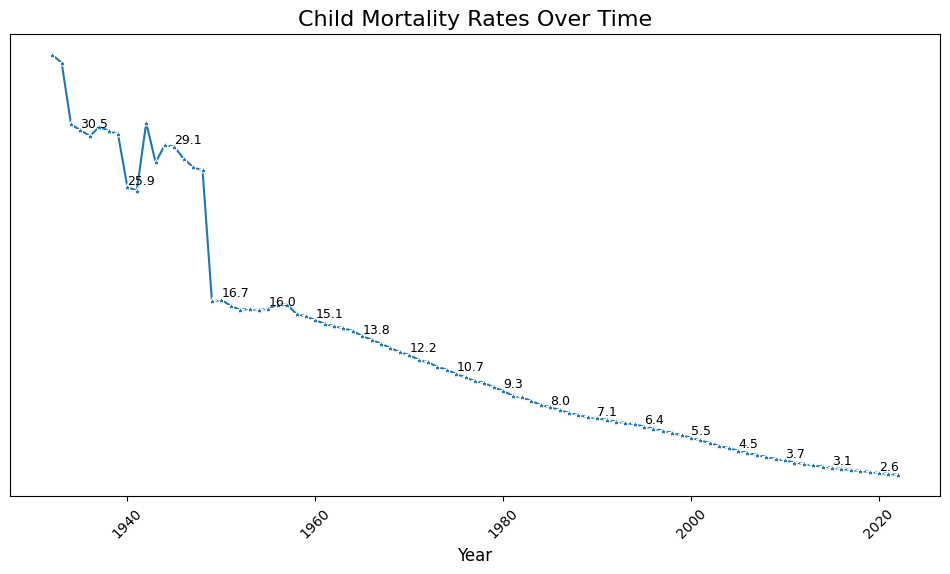

In [15]:
# Plot the data
plt.figure(figsize=(12, 6))

# Plot the lineplot with Year on the x-axis and Under-five mortality rate on the y-axis
sns.lineplot(x='Year', y='Under-five mortality rate', data=child_mortality, ci=None,marker='*')

# Set the title and labels
plt.title('Child Mortality Rates Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Under-five Mortality Rate', fontsize=12)

# Add selective data labels (just a few data points)
for i, line in enumerate(plt.gca().lines):
    if i % 5 == 0:  # Show every 5th data point as label
        for x, y in zip(line.get_xdata(), line.get_ydata()):
            if x % 5 == 0:  # Adjust condition for which data points to label
                plt.text(x, y, f'{y:.1f}', fontsize=9, color='black', ha='left', va='bottom')

# Customize the plot
plt.title('Child Mortality Rates Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('')  # Hide y-axis label
plt.yticks([])  # Remove y-axis values
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.grid(False)  # Remove gridlines

# Show the plot
plt.show()


In [16]:
# Calculate the average youth mortality rate for each country
top_countries = child_mortality.groupby('Entity')['Under-five mortality rate'].mean().nlargest(10)

# Display the top 10 countries
print(top_countries)

Entity
Sierra Leone    25.747834
Guinea          25.656954
Niger           24.951967
Burkina Faso    24.095998
South Sudan     23.916234
Mali            23.600816
Liberia         21.666276
Benin           20.974372
Malawi          20.769975
Africa          20.674081
Name: Under-five mortality rate, dtype: float64


# Analysis 1: Health Protection Coverage and Youth Mortality Rate

Explore how access to health insurance coverage is linked to youth mortality rates. Health coverage might mitigate youth mortality by improving access to healthcare services, vaccinations, and reducing preventable deaths.

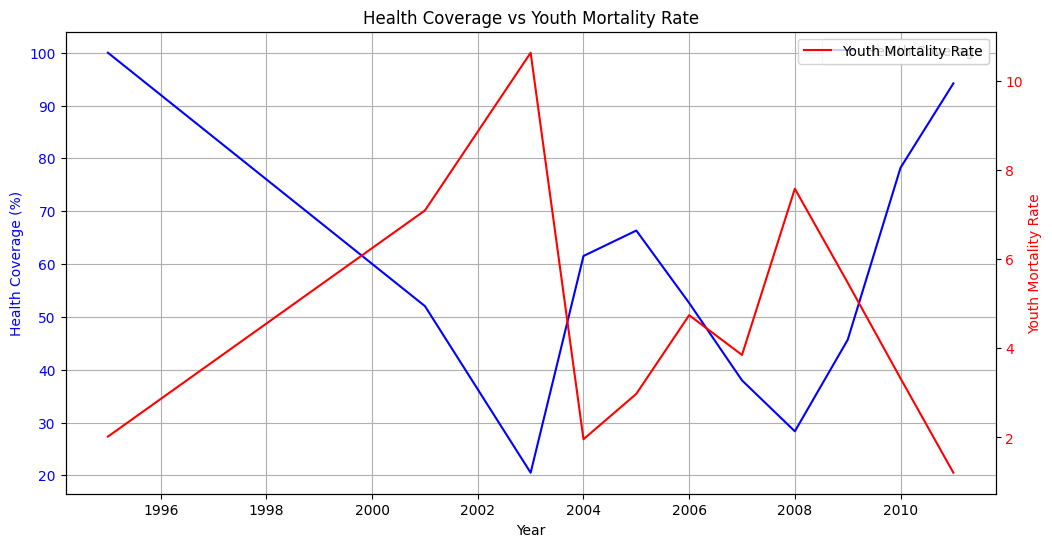

In [17]:
# Merge data on 'Entity' and 'Year'
merged_data = pd.merge(health_protection, youth, on=['Entity', 'Year'])

# Plotting health coverage vs youth mortality rate with two y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot health coverage on the primary y-axis (left)
sns.lineplot(data=merged_data, x='Year', y='Share of population covered by health insurance (ILO (2014))',
             label='Health Coverage', color='b', ci=None, ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('Health Coverage (%)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create secondary y-axis to plot youth mortality rate
ax2 = ax1.twinx()
sns.lineplot(data=merged_data, x='Year', y='Under-fifteen mortality rate',
             label='Youth Mortality Rate', color='r', ci=None, ax=ax2)
ax2.set_ylabel('Youth Mortality Rate', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Title and Grid
plt.title('Health Coverage vs Youth Mortality Rate')
ax1.grid(True)

# Show the plot
plt.show()


Hypothesis testing

In [18]:
# Calculate the correlation coefficient and p-value
correlation_coefficient, p_value = stats.pearsonr(
    merged_data['Share of population covered by health insurance (ILO (2014))'],
    merged_data['Under-fifteen mortality rate']
)

# Display the results
print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant relationship between health coverage and youth mortality rates.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between health coverage and youth mortality rates.")

Correlation Coefficient: -0.7223352909656819
P-value: 1.3086087906156104e-26
Reject the null hypothesis: There is a significant relationship between health coverage and youth mortality rates.


# Obervation

Health Coverage is inversely related to Youth mortality rate. This means that as Health coverage is high, Youth mortality rate is low. Countries with higher health protection coverage (access to insurance) show lower youth mortality rates due to improved access to healthcare services, including vaccinations and treatment for common childhood diseases.

-----
# Recommendations for Addressing the Relationship Between Health Coverage and Youth Mortality Rates

Given the significant negative correlation between health coverage and youth mortality rates, the following recommendations are made to improve health outcomes for young populations:

## 1. Expand Access to Health Insurance

- **Universal Health Coverage Initiatives**: Implement policies aimed at achieving universal health coverage to ensure that all children and adolescents have access to health insurance. This could involve expanding public health programs and subsidies for low-income families.

## 2. Improve Preventive Healthcare Services

- **Vaccination Accessibility**: Strengthen vaccination programs to ensure all children receive essential immunizations. This includes outreach to underserved communities to eliminate barriers to access.
- **Routine Health Screenings**: Establish regular health check-up programs in schools and communities to detect health issues early and provide timely interventions.

## 3. Enhance Healthcare Infrastructure

- **Increase Healthcare Facilities**: Invest in building and upgrading healthcare facilities, especially in rural and low-income urban areas, to ensure timely access to medical care.
- **Telehealth Services**: Expand telehealth options to reach families in remote areas, providing them with easier access to healthcare consultations and follow-ups.

## 4. Promote Health Education and Awareness

- **Community Outreach Programs**: Develop initiatives to educate families about the importance of health insurance and regular medical care for children. Use community events, social media, and local partnerships to spread awareness.
- **Engagement with Schools**: Collaborate with educational institutions to incorporate health education into the curriculum, emphasizing the importance of preventive care and healthy lifestyles.

## 5. Monitor and Evaluate Health Outcomes

- **Data Tracking**: Establish systems for continuous monitoring of health coverage rates and youth mortality statistics. This will facilitate the identification of trends and help in adjusting policies as needed.
- **Impact Assessment of Initiatives**: Regularly evaluate the effectiveness of health programs and policies aimed at increasing coverage and reducing youth mortality rates, using data-driven approaches to inform decisions.

## Conclusion

By following these recommendations, stakeholders can effectively address the significant correlation between health coverage and youth mortality rates. Improving access to health insurance and healthcare services is crucial for fostering healthier futures for young populations.

# Analysis 2: Global Vaccination Coverage and Child Mortality
This analysis examines the relationship between global vaccination coverage and child mortality rates. Vaccinations, including those for BCG (Bacillus Calmette-Guérin), Polio (Pol3), and DTP (Diphtheria, Tetanus, and Pertussis, DTP3), are essential in preventing fatal diseases and significantly contributing to child health.


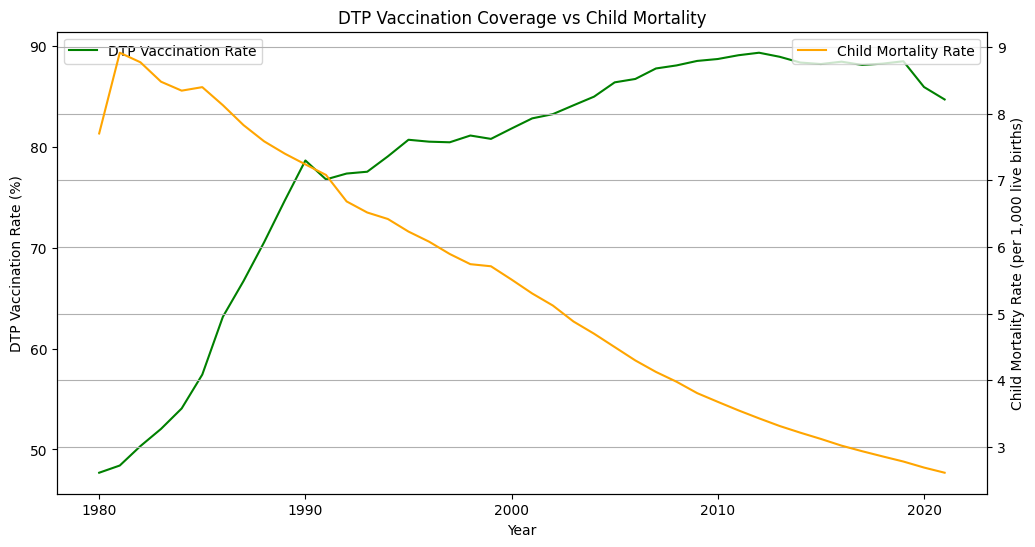

In [19]:
# Merging data
merged_vaccine_mortality = pd.merge(global_vaccination, child_mortality, on=['Entity', 'Year'])

# Plotting vaccinations vs child mortality rate
plt.figure(figsize=(12, 6))

# Primary axis for DTP Vaccination Rate
sns.lineplot(data=merged_vaccine_mortality, x='Year', y='DTP3 (% of one-year-olds immunized)', label='DTP Vaccination Rate', color='g', ci=None)
plt.ylabel('DTP Vaccination Rate (%)')

# Secondary axis for Child Mortality Rate
ax2 = plt.gca().twinx()
sns.lineplot(data=merged_vaccine_mortality, x='Year', y='Under-five mortality rate', label='Child Mortality Rate', color='orange', ci=None, ax=ax2)
ax2.set_ylabel('Child Mortality Rate (per 1,000 live births)')

# Title and legend
plt.title('DTP Vaccination Coverage vs Child Mortality')
plt.xlabel('Year')
plt.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.grid(True)
plt.show()

Hypothesis testing

In [20]:

# Extract relevant data
vaccination_rates = merged_vaccine_mortality['DTP3 (% of one-year-olds immunized)']
mortality_rates = merged_vaccine_mortality['Under-five mortality rate']

# Check for NaN values
print("NaN values in vaccination rates:", vaccination_rates.isna().sum())
print("NaN values in mortality rates:", mortality_rates.isna().sum())

# Drop rows with NaN values
cleaned_data = merged_vaccine_mortality.dropna(subset=['DTP3 (% of one-year-olds immunized)', 'Under-five mortality rate'])

# Extract cleaned data
vaccination_rates_cleaned = cleaned_data['DTP3 (% of one-year-olds immunized)']
mortality_rates_cleaned = cleaned_data['Under-five mortality rate']

# Conduct Pearson correlation test
correlation_coefficient, p_value = stats.pearsonr(vaccination_rates_cleaned, mortality_rates_cleaned)

# Display results
print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

# Decision
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant correlation between DTP vaccination rates and child mortality rates.")
else:
    print("Fail to reject the null hypothesis: There is no significant correlation between DTP vaccination rates and child mortality rates.")

NaN values in vaccination rates: 42
NaN values in mortality rates: 0
Correlation Coefficient: -0.729241328220766
P-value: 0.0
Reject the null hypothesis: There is a significant correlation between DTP vaccination rates and child mortality rates.


## Observation
The analysis revealed a **correlation coefficient of -0.73**, indicating a strong negative correlation between DTP vaccination rates and child mortality rates. This suggests that as DTP vaccination rates increase, child mortality rates tend to decrease significantly. The **p-value of 0.0** (less than the significance level of 0.05) reinforces this finding, leading to the rejection of the null hypothesis.

## Recommendation
Given the significant negative correlation observed:

1. **Policy Implementation**: Governments and health organizations should prioritize increasing DTP vaccination coverage, especially in regions with high child mortality rates. This can be achieved through enhanced vaccination campaigns, public awareness initiatives, and improved access to healthcare services.

2. **Resource Allocation**: Allocate more resources to vaccination programs, including funding for outreach, education, and healthcare infrastructure, particularly in underserved communities.

3. **Monitoring and Evaluation**: Establish a framework for continuous monitoring of vaccination rates and child mortality statistics to evaluate the effectiveness of interventions. This will help in making data-driven decisions and adjustments to programs as necessary.

4. **Further Research**: Conduct additional studies to explore the causal relationship between vaccination and mortality rates, accounting for other influencing factors such as socioeconomic status, healthcare access, and disease prevalence.

## Conclusion
The findings indicate a significant negative correlation between DTP vaccination rates and child mortality rates, suggesting that higher vaccination coverage is associated with lower child mortality. This highlights the critical role of vaccination in improving child health outcomes and underscores the need for continued efforts to enhance immunization programs globally. By implementing the recommended strategies, stakeholders can work towards reducing child mortality and improving public health.

# Analysis 3: Births Attended by Health Staff and Maternal Mortality


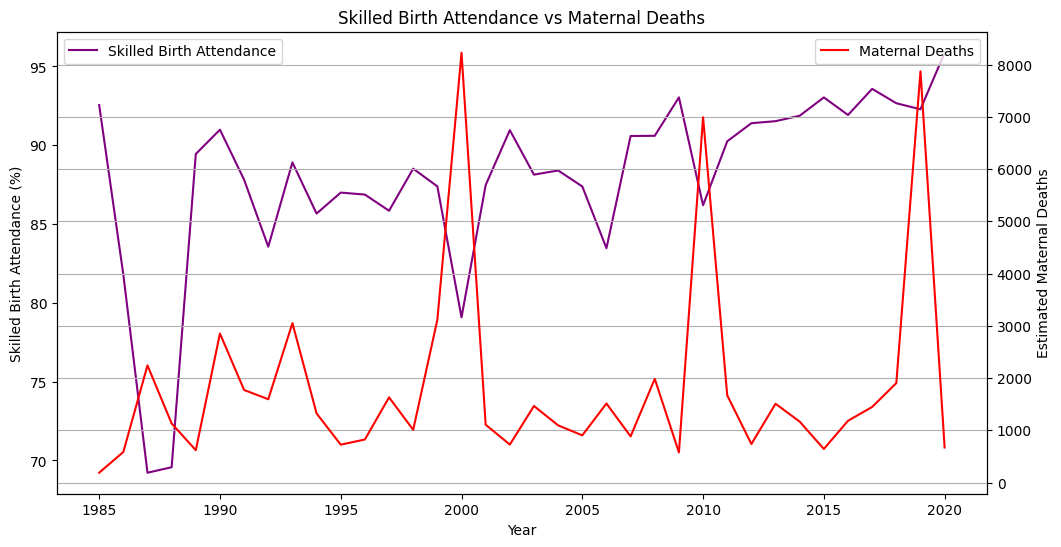

In [21]:
# Merging data
merged_birth_maternal = pd.merge(birth, maternal_death, on=['Entity', 'Year'])

# Plotting births attended vs maternal deaths
plt.figure(figsize=(12, 6))

# Primary axis for Skilled Birth Attendance
sns.lineplot(data=merged_birth_maternal, x='Year',
             y='Births attended by skilled health staff (% of total)',
             label='Skilled Birth Attendance', color='purple', ci=None)
plt.ylabel('Skilled Birth Attendance (%)')

# Secondary axis for Maternal Deaths
ax2 = plt.gca().twinx()
sns.lineplot(data=merged_birth_maternal, x='Year',
             y='Estimated maternal deaths',
             label='Maternal Deaths', color='red', ci=None, ax=ax2)
ax2.set_ylabel('Estimated Maternal Deaths')

# Title and legend
plt.title('Skilled Birth Attendance vs Maternal Deaths')
plt.xlabel('Year')
plt.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.grid(True)
plt.show()

Hypothesis testing

In [22]:
# Extract relevant data
skilled_birth_attendance = merged_birth_maternal['Births attended by skilled health staff (% of total)']
maternal_deaths = merged_birth_maternal['Estimated maternal deaths']

# Check for NaN values and clean data
cleaned_data = merged_birth_maternal.dropna(subset=['Births attended by skilled health staff (% of total)', 'Estimated maternal deaths'])

# Extract cleaned data
skilled_birth_attendance_cleaned = cleaned_data['Births attended by skilled health staff (% of total)']
maternal_deaths_cleaned = cleaned_data['Estimated maternal deaths']

# Conduct Pearson correlation test
correlation_coefficient, p_value = stats.pearsonr(skilled_birth_attendance_cleaned, maternal_deaths_cleaned)

# Display results
print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

# Decision
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant correlation between skilled birth attendance and maternal deaths.")
else:
    print("Fail to reject the null hypothesis: There is no significant correlation between skilled birth attendance and maternal deaths.")

Correlation Coefficient: -0.21727890791235444
P-value: 1.051237719351682e-31
Reject the null hypothesis: There is a significant correlation between skilled birth attendance and maternal deaths.




## Observation
The analysis revealed a **correlation coefficient of -0.22**, indicating a weak to moderate negative correlation between the percentage of births attended by skilled health staff and maternal mortality rates. The **p-value of approximately 1.05e-31** is significantly lower than the threshold of 0.05, leading to the rejection of the null hypothesis. This suggests that as the percentage of births attended by skilled health staff increases, maternal mortality rates tend to decrease.

## Recommendation
Based on the findings, the following recommendations are proposed:

1. **Enhance Skilled Birth Attendance**: Governments and health organizations should prioritize initiatives aimed at increasing the percentage of births attended by skilled health personnel. This could involve training more healthcare providers and ensuring they are accessible, especially in rural or underserved areas.

2. **Public Awareness Campaigns**: Launch campaigns to educate communities about the importance of skilled birth attendance. This can help increase demand for healthcare services during childbirth.

3. **Healthcare Infrastructure Improvement**: Invest in healthcare infrastructure to ensure that skilled health staff have the necessary resources and facilities to provide quality care during childbirth.

4. **Monitoring and Evaluation**: Establish robust monitoring systems to track the percentage of skilled birth attendance and maternal mortality rates over time. This data can inform policy decisions and resource allocations.

5. **Further Research**: Conduct more detailed studies to explore the causal relationships and other factors influencing maternal mortality, such as socioeconomic status, access to healthcare, and education.

## Conclusion
The analysis indicates a significant negative correlation between skilled birth attendance and maternal mortality rates, suggesting that higher skilled attendance is associated with lower maternal mortality. These findings underscore the critical importance of improving access to skilled healthcare during childbirth as a means to enhance maternal health outcomes and reduce preventable deaths. By implementing the recommended strategies, stakeholders can work towards achieving better maternal health globally.

# Analysis 4: Correlation Between Vaccination Rates, Health Coverage, and Child Mortality

## Introduction

This analysis explores the interrelationship between vaccination rates, health insurance coverage, and child mortality rates. Understanding how these factors interplay can provide valuable insights into effective strategies for improving child health outcomes.

## The Importance of Each Factor

### Vaccination Rates

Vaccinations are critical in preventing infectious diseases that can lead to morbidity and mortality in children. Higher vaccination rates are associated with:

- **Reduced Incidence of Vaccine-Preventable Diseases**: With widespread immunization, diseases like measles, polio, and whooping cough become less common.
- **Herd Immunity**: When a significant portion of the population is vaccinated, it protects those who cannot be vaccinated, such as infants and immunocompromised individuals.

### Health Coverage

Health insurance coverage plays a vital role in ensuring that children have access to necessary medical services. Key benefits include:

- **Access to Preventive Care**: Insurance facilitates regular check-ups and vaccinations, leading to early detection and treatment of health issues.
- **Financial Protection**: Coverage reduces the financial burden of medical expenses, making healthcare more accessible for families.

### Child Mortality

Child mortality rates are a critical indicator of a country's health status and the effectiveness of its healthcare systems. Factors influencing child mortality include:

- **Access to Healthcare Services**: Higher health coverage and vaccination rates typically correlate with lower mortality rates.
- **Socioeconomic Factors**: Economic stability, education, and healthcare infrastructure also significantly impact child health outcomes.

## Hypothesis

The hypothesis driving this analysis is that improvements in both vaccination rates and health insurance coverage will lead to a significant reduction in child mortality rates. Specifically, a multi-dimensional approach that enhances all three factors simultaneously could yield the greatest health benefits for children.

## Methodology

To analyze the correlation between these variables, data on:

- **Vaccination Rates**: Percentage of children vaccinated against key diseases.
- **Health Coverage**: Percentage of the population with health insurance.
- **Child Mortality Rates**: Number of deaths per 1,000 live births in children under five.

Statistical methods, such as Pearson correlation analysis, can be employed to assess the relationships between these factors.


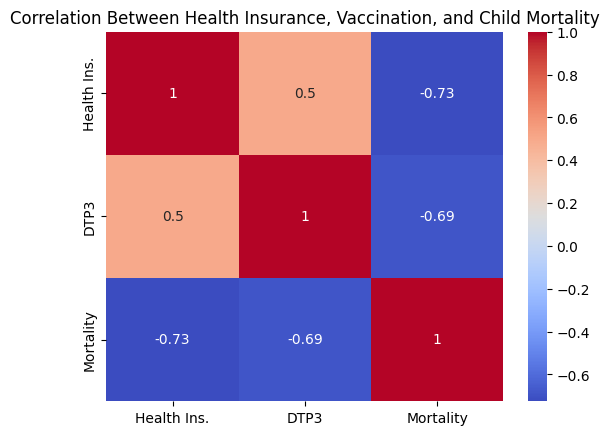

In [23]:
# Correlation analysis
merged_combined = pd.merge(health_protection, global_vaccination, on=['Entity','Year'])
merged_combined = pd.merge(merged_combined, child_mortality, on=['Entity','Year'])

# Calculate correlation matrix
correlation_matrix = merged_combined[['Share of population covered by health insurance (ILO (2014))',
                                      'DTP3 (% of one-year-olds immunized)',
                                      'Under-five mortality rate']].corr()

# Plot correlation heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',
             xticklabels=['Health Ins.', 'DTP3', 'Mortality'],
             yticklabels=['Health Ins.', 'DTP3', 'Mortality'])
plt.title('Correlation Between Health Insurance, Vaccination, and Child Mortality')
plt.show()




## Observations

From the correlation analysis illustrated in the heatmap, the following key observations can be made:

1. **Strong Negative Correlation**: There is a strong negative correlation between the **Share of the population covered by health insurance** and the **Under-five mortality rate** (-0.73). This indicates that as health insurance coverage increases, child mortality rates tend to decrease significantly.

2. **Vaccination Influence**: The correlation between **DTP3 vaccination rates** and **Under-five mortality rate** is also negative (-0.69), suggesting that higher vaccination rates are associated with lower mortality rates among children.

3. **Moderate Correlation**: The correlation between **Health Coverage** and **DTP3 vaccination rates** is moderate (0.50), indicating that increased health insurance coverage may lead to higher vaccination rates among children.

## Recommendations

Based on these observations, the following recommendations are proposed:

1. **Enhance Health Insurance Coverage**:
   - Implement policies aimed at increasing health insurance access for families, especially in underserved populations. This could include subsidies or community programs to raise awareness and enrollment.

2. **Strengthen Vaccination Programs**:
   - Focus on improving DTP3 vaccination rates through targeted public health campaigns. Ensure availability of vaccines and educate parents on the importance of immunizations.

3. **Integrated Health Initiatives**:
   - Develop integrated initiatives that combine health insurance enrollment with vaccination drives. This approach can improve both coverage and immunization rates, leading to better health outcomes for children.

4. **Ongoing Monitoring and Evaluation**:
   - Establish systems for continuous monitoring of health insurance coverage, vaccination rates, and child mortality. Use this data to inform policy decisions and identify areas needing attention.

## Conclusion

The correlation analysis underscores the critical interrelationship between health insurance coverage, vaccination rates, and child mortality. The strong negative correlations suggest that improvements in health coverage and vaccination can significantly reduce child mortality rates.

By prioritizing these areas through targeted policies and programs, stakeholders can make substantial progress in enhancing child health outcomes and reducing preventable deaths among children under five. Collaborative efforts focused on these interconnected factors will be essential in achieving meaningful improvements in public health.



# SDG 3 Analysis: A Journey Through Child and Youth Mortality and Health Coverage

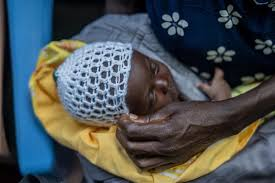
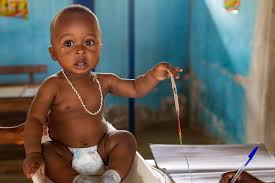
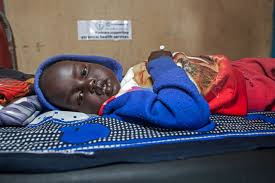
### **Introduction and Dataset Overview**

In this analysis, I focused on understanding the progress toward achieving **Sustainable Development Goal (SDG) 3**: ensuring healthy lives and promoting well-being for all at all ages. The datasets I analyzed encompass a wide range of health metrics, including **youth mortality rates**, **health coverage**, **vaccination rates**, **maternal and child health**, and the **leading causes of death in children under five**. These indicators are crucial for understanding the challenges and progress in healthcare systems, especially in regions struggling with high mortality rates and limited access to healthcare services.

The datasets provided a holistic view of the factors influencing health outcomes, such as the **percentage of the population covered by health insurance**, **vaccination coverage**, and **the proportion of births attended by skilled health staff**. By analyzing these datasets, I aimed to draw insights into the patterns of child mortality and explore the impact of healthcare interventions.

### **Key Observations**

#### 1. **Youth Mortality Rate Trends**:
   - **Youth mortality rates**, particularly in countries like **Guinea**, **Mali**, and **Niger**, have been steadily declining over the years. This trend is a positive sign that healthcare improvements, including better access to vaccinations, maternal healthcare, and nutrition, are reducing preventable child deaths.
   - This decline aligns with the **SDG 3 targets**, which focus on reducing child mortality. The optimistic trend suggests that the goal of reducing under-five mortality to at least 25 deaths per 1,000 live births by 2030 is achievable if the current healthcare strategies are scaled and sustained.

#### 2. **Health Coverage vs Youth Mortality**:
   - There appears to be a **correlation** between increased **health insurance coverage** and the reduction in **youth mortality rates**. Countries with higher health coverage seem to experience lower mortality rates, highlighting the importance of expanding **health insurance** to reduce financial barriers to healthcare access.
   - While the data suggests that improving health coverage positively impacts youth mortality, further analysis is needed to understand the specific factors driving these trends, such as the quality of healthcare services, public health campaigns, and healthcare infrastructure.

#### 3. **Global Vaccination Coverage**:
   - **Vaccination rates** are a critical determinant of child health, and countries with higher vaccination coverage tend to see lower child mortality rates. The dataset showed that **DTP3**, **BCG**, and **Pol3** vaccination rates are strongly correlated with the decline in under-five mortality.
   - Continued focus on expanding immunization programs, particularly in regions with low coverage, will play a vital role in achieving the SDG 3 targets.

#### 4. **Maternal and Child Health**:
   - The dataset on **births attended by skilled health staff** demonstrated that countries with higher percentages of skilled attendants at births tend to experience lower maternal and child mortality rates. This highlights the importance of **maternal health** in reducing child mortality.
   - Increasing access to **skilled birth attendants** and **prenatal care** can further reduce risks during childbirth and improve health outcomes for both mothers and children.


### **Recommendations**

1. **Expand Health Insurance Coverage**:
   - To further reduce **youth mortality**, I recommend prioritizing the **expansion of health insurance coverage**. Ensuring that more people, especially in low-income countries, have access to affordable health insurance will reduce the financial barriers to healthcare services and contribute to better health outcomes.

2. **Increase Vaccination Coverage**:
   - Expanding **global vaccination coverage** should remain a priority. Ensuring that vaccines such as **DTP3**, **Polio**, and **BCG** are available to all children, especially in rural and underserved areas, can significantly reduce mortality rates.

3. **Focus on Maternal Health**:
   - Increasing access to **skilled birth attendants** and **prenatal care** is crucial to reducing **maternal and child mortality**. Governments and international organizations should continue to invest in maternal health education and healthcare services to ensure that more women have access to skilled care during pregnancy and childbirth.

4. **Tackle Preventable Diseases**:
   - Focusing on **preventable diseases** like **pneumonia**, **malaria**, and **diarrhea** is essential. Governments should invest in **sanitation**, **clean water access**, and **nutrition programs**, as well as enhance **public health campaigns** to combat these diseases effectively.

5. **Improve Healthcare Infrastructure**:
   - In regions with high mortality rates, improving **healthcare infrastructure**, especially in **rural areas**, is crucial. **Mobile health clinics**, better transportation networks, and local health centers will help provide essential services to populations in need.

### **Conclusion**

Through this analysis, I have observed significant progress toward SDG 3 goals, particularly in the decline of youth mortality rates in certain regions. However, there are still challenges to overcome, including access to quality healthcare and education about health practices in many developing countries. Continued efforts in expanding health coverage, improving vaccination rates, and addressing preventable causes of death will play a key role in achieving SDG 3 by 2030.

### **Limitations of the Dataset**

- **Data Gaps**: Some countries have limited data for certain years, leading to potential gaps in analysis. This may skew the trends, especially in regions with inconsistent reporting.
- **Data Quality**: Variations in how countries report and categorize data may impact the consistency and comparability across datasets.
- **Geographical Representation**: Some regions, particularly in conflict zones or those with less infrastructure, might be underrepresented, leading to a lack of complete insights from these areas.

### **Further Enrichment**

- **Incorporating Other Indicators**: Future analysis could include additional indicators such as **nutrition** and **education** data, which can provide a more holistic view of the factors influencing health outcomes.
- **Machine Learning Models**: Leveraging machine learning to predict health outcomes based on multiple variables (e.g., health coverage, vaccination rates, maternal health) can improve the accuracy of projections and help target interventions more effectively.

I am excited to continue exploring the impact of these factors on **SDG 3** and contribute to the global effort to improve healthcare for all.


# Machine Learning Model

In [37]:
# Example merging of datasets
merged_data = pd.merge(health_protection, child_mortality, on=['Entity', 'Year'])
merged_data = pd.merge(merged_data, global_vaccination, on=['Entity', 'Year'])
# Add other datasets similarly, like maternal deaths, infant deaths, etc.


Data Cleaning

In [38]:
# Calculate percentage of missing values
missing_values = round(merged_data.isnull().sum() / merged_data.shape[0] * 100, 2)

# Filter to only include columns with missing values
missing_columns = missing_values[missing_values > 0]

# Drop columns with more than 50% missing values
columns_to_drop = missing_columns[missing_columns > 50].index
merged_data = merged_data.drop(columns=columns_to_drop)

In [39]:

# Calculate percentage of missing values
missing_values = round(merged_data.isnull().sum() / merged_data.shape[0] * 100, 2)

# Filter to only include columns with missing values
missing_columns = missing_values[missing_values > 0]

# Replace missing values with the median of each column
for column in merged_data.columns:
    if merged_data[column].isnull().any():
        median_value = merged_data[column].median()
        merged_data[column].fillna(median_value, inplace=True)

# Verify that missing values have been replaced
missing_after_replacement = merged_data.isnull().sum().sum()
missing_after_replacement

0

In [97]:
x = merged_data.drop(['Under-five mortality rate', 'Entity','Code_x','Code_y'], axis=1)  # Features
y = merged_data['Under-five mortality rate']  # Target

In [98]:
x

,Year,Share of population covered by health insurance (ILO (2014)),BCG (% of one-year-olds immunized),HepB3 (% of one-year-olds immunized),Hib3 (% of one-year-olds immunized),MCV1 (% of one-year-olds immunized),Pol3 (% of one-year-olds immunized),RCV1 (% of one-year-olds immunized),DTP3 (% of one-year-olds immunized)
0,2008,23.6,99.0,99.0,94.0,98.0,99.0,98.0,99.0
1,2005,85.2,98.0,83.0,94.0,83.0,88.0,95.0,88.0
2,2010,0.0,79.0,49.0,49.0,62.0,56.0,95.0,51.0
3,2007,51.1,95.0,97.0,99.0,99.0,98.0,99.0,99.0
4,2009,96.8,99.0,94.0,94.0,96.0,97.0,96.0,94.0
...,...,...,...,...,...,...,...,...,...
151,2010,100.0,92.0,78.0,78.0,79.0,74.0,79.0,78.0
152,2010,61.0,94.0,88.0,63.0,98.0,94.0,95.0,93.0
153,2003,42.0,66.0,38.0,94.0,64.0,61.0,95.0,61.0
154,2008,8.4,91.0,87.0,87.0,87.0,90.0,95.0,87.0


In [76]:
y

,Under-five mortality rate
0,1.575113
1,3.379765
2,11.957712
3,1.267723
4,1.496454
...,...
151,1.708802
152,2.305393
153,7.935232
154,8.834710


Feature Selection

In [77]:
# Compute Mutual Information
mi = mutual_info_regression(x, y)
mutual_info = pd.Series(mi, index=x.columns)

# Remove features with MI score of 0
filtered_features = mutual_info[mutual_info > 0]

# Sort filtered features for visualization
filtered_features = filtered_features.sort_values(ascending=False)
filtered_features

,0
Share of population covered by health insurance (ILO (2014)),0.529478
RCV1 (% of one-year-olds immunized),0.266065
Pol3 (% of one-year-olds immunized),0.251654
DTP3 (% of one-year-olds immunized),0.242236
Year,0.229267
MCV1 (% of one-year-olds immunized),0.222965
BCG (% of one-year-olds immunized),0.197606
HepB3 (% of one-year-olds immunized),0.194548
Hib3 (% of one-year-olds immunized),0.081310


In [99]:
# Split the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Model Evaluation

LightGBM

In [93]:


# Initialize the LightGBM model
lgbm_model = LGBMRegressor(n_estimators=500, learning_rate=0.08, max_depth=10, subsample=0.7)

# Fit the model on the training data
lgbm_model.fit(x_train, y_train)

# Make predictions on the test data
lgbm_predictions = lgbm_model.predict(x_test)

# Evaluate LightGBM
lgbm_rmse = np.sqrt(mean_squared_error(y_test, lgbm_predictions))
lgbm_r2 = r2_score(y_test, lgbm_predictions)

# Print the evaluation metrics
print(f"LightGBM RMSE: {lgbm_rmse}")
print(f"LightGBM R²: {lgbm_r2}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000056 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 169
[LightGBM] [Info] Number of data points in the train set: 124, number of used features: 9
[LightGBM] [Info] Start training from score 3.538475
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

Random Forest

In [88]:

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=500, max_depth=10, min_samples_split=5, random_state=42)

# Fit the model on the training data
rf_model.fit(x_train, y_train)

# Make predictions on the test data
rf_predictions = rf_model.predict(x_test)

# Evaluate Random Forest
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
rf_r2 = r2_score(y_test, rf_predictions)

print(f"Random Forest RMSE: {rf_rmse}")
print(f"Random Forest R²: {rf_r2}")

Random Forest RMSE: 2.727238610692673
Random Forest R²: 0.5319248623625462


In [94]:
# Save the trained model
joblib.dump(lgbm_model, 'child_mortality_predictor.pkl')

['child_mortality_predictor.pkl']

In [102]:

import pickle

# Load your pre-trained model
model = pickle.load(open('child_mortality_predictor.pkl', 'rb'))

# Load feature names (example uses a training DataFrame structure; adjust as needed)
feature_names = [
    'Year',
    'Share of population covered by health insurance (ILO (2014))',
    'BCG (% of one-year-olds immunized)',
    'HepB3 (% of one-year-olds immunized)',
    'Hib3 (% of one-year-olds immunized)',
    'MCV1 (% of one-year-olds immunized)',
    'Pol3 (% of one-year-olds immunized)',
    'RCV1 (% of one-year-olds immunized)',
    'DTP3 (% of one-year-olds immunized)'
]

# Title of the app
st.title("Child Mortality Prediction App")
st.write("### Predict the child mortality rate using healthcare indicators.")

# Sidebar for user input
st.sidebar.header("Input Parameters")
user_inputs = {}

# Dynamically create input fields for all features
for feature in feature_names:
    if "Year" in feature:
        user_inputs[feature] = st.sidebar.number_input(feature, value=2020, step=1, format="%d")
    elif "%" in feature or "Rate" in feature:
        user_inputs[feature] = st.sidebar.slider(feature, 0.0, 100.0, 50.0)
    else:
        user_inputs[feature] = st.sidebar.number_input(feature, value=0)

# Convert user inputs to a DataFrame
input_df = pd.DataFrame([user_inputs])

# Display input data
st.write("### Input Data")
st.write(input_df)

# Make predictions using the loaded model
prediction = model.predict(input_df)
st.write("### Predicted Child Mortality Rate")
st.write(f"{prediction[0]:.2f} deaths per 1,000 children")

# Notes
st.write("""
### Notes:
- Ensure the values you input represent real-world scenarios.
- This tool provides insights to explore SDG 3 healthcare goals.
""")


2024-11-30 15:52:37.081 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-30 15:52:37.184 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-11-30 15:52:37.187 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-30 15:52:37.189 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-30 15:52:37.193 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-30 15:52:37.200 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-30 15:52:37.201 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-30 15:52:37.204 Thread 'MainThread': mi